In [35]:
import pandas as pd # for loading csv datasets
import matplotlib.pyplot as plt # for data plotting
import seaborn as sns
import numpy as np

from functools import reduce # for data merging
from sklearn.preprocessing import LabelEncoder # for label encoding

from sklearn.model_selection import train_test_split # dataset splititng
from sklearn import metrics # metrics

from sklearn.linear_model import LogisticRegression # fiiting log model
from sklearn.ensemble import RandomForestClassifier # random forest model
from sklearn.svm import SVC # fitting svm

from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions


In [2]:
weather_conditions_df = pd.read_csv(f'C:/Users/o/Downloads/big-data-weather-forecasting/dataset/weather_description.csv')
humidity_df = pd.read_csv(f'C:/Users/o/Downloads/big-data-weather-forecasting/dataset/humidity.csv')
pressure_df = pd.read_csv(f'C:/Users/o/Downloads/big-data-weather-forecasting/dataset/pressure.csv')
temperature_df = pd.read_csv(f'C:/Users/o/Downloads/big-data-weather-forecasting/dataset/temperature.csv')
city_attributes_df = pd.read_csv(f'C:/Users/o/Downloads/big-data-weather-forecasting/dataset/city_attributes.csv')
wind_direction_df = pd.read_csv(f'C:/Users/o/Downloads/big-data-weather-forecasting/dataset/wind_direction.csv')
wind_speed_df = pd.read_csv(f'C:/Users/o/Downloads/big-data-weather-forecasting/dataset/wind_speed.csv')

In [3]:
## Lets manipulate the structure of each data frame in order to merge them

#  # weather_conditions_df
weather_conditions_new_df = pd.melt(weather_conditions_df, id_vars="datetime")

# rename the new variable to City
weather_conditions_new_df.rename(columns = {'datetime':'datetime','variable':'City', 'value':'Weather_Condition' }, inplace = True)

# clean by droping the null values in weather_conditions_df
not_null_weather_conditions_new_df = weather_conditions_new_df.dropna()

#drop duplicates
not_null_weather_conditions_new_df = not_null_weather_conditions_new_df.drop_duplicates()

# shuffle the not_null_weather_conditions_new_df dataset 
not_null_weather_conditions_new_df = not_null_weather_conditions_new_df.sample(frac=1).reset_index(drop=True)
not_null_weather_conditions_new_df = not_null_weather_conditions_new_df.loc[:5000]
# not_null_weather_conditions_new_df


#  # wind_direction_df
wind_direction_new_df = pd.melt(wind_direction_df, id_vars="datetime")

# rename the new variable to City
wind_direction_new_df.rename(columns = {'datetime':'datetime','variable':'City', 'value':'wind_direction' }, inplace = True)

# clean by droping the null values in weather_conditions_df
not_null_wind_direction_new_df = wind_direction_new_df.dropna()

#drop duplicates
not_null_wind_direction_new_df = not_null_wind_direction_new_df.drop_duplicates()

# shuffle the not_null_weather_conditions_new_df dataset 
not_null_wind_direction_new_df = not_null_wind_direction_new_df.sample(frac=1).reset_index(drop=True)
not_null_wind_direction_new_df = not_null_wind_direction_new_df.loc[:5000]



# # humidity_df
humidity_new_df = pd.melt(humidity_df, id_vars="datetime")

# rename the new variable to City
humidity_new_df.rename(columns = {'datetime':'datetime','variable':'City', 'value':'humidity' }, inplace = True)

# clean by droping the null values in weather_conditions_df
not_null_humidity_new_df = humidity_new_df.dropna()

#drop duplicates
not_null_humidity_new_df = not_null_humidity_new_df.drop_duplicates()

# shuffle the not_null_weather_conditions_new_df dataset 
not_null_humidity_new_df =not_null_humidity_new_df.sample(frac=1).reset_index(drop=True)
not_null_humidity_new_df = not_null_humidity_new_df.loc[:5000]
# not_null_pressure_new_df



# # pressure_df
pressure_new_df = pd.melt(pressure_df, id_vars="datetime")

# rename the new variable to City
pressure_new_df.rename(columns = {'datetime':'datetime','variable':'City', 'value':'pressure' }, inplace = True)

# clean by droping the null values in weather_conditions_df
not_null_pressure_new_df = pressure_new_df.dropna()

#drop duplicates
not_null_pressure_new_df = not_null_pressure_new_df.drop_duplicates()

# shuffle the not_null_weather_conditions_new_df dataset 
not_null_pressure_new_df = not_null_pressure_new_df.sample(frac=1).reset_index(drop=True)
not_null_pressure_new_df = not_null_pressure_new_df.loc[:5000]
# not_null_pressure_new_df



# # temperature_df
temperature_new_df = pd.melt(temperature_df, id_vars="datetime")

# rename the new variable to City
temperature_new_df.rename(columns = {'datetime':'datetime','variable':'City', 'value':'temperature' }, inplace = True)

# clean by droping the null values in weather_conditions_df
not_null_temperature_new_df = temperature_new_df.dropna()

#drop duplicates
not_null_temperature_new_df = not_null_temperature_new_df.drop_duplicates()

# shuffle the not_null_weather_conditions_new_df dataset 
not_null_temperature_new_df = not_null_temperature_new_df.sample(frac=1).reset_index(drop=True)
not_null_temperature_new_df = not_null_temperature_new_df.loc[:5000]


# # wind_speed_df
wind_speed_new_df = pd.melt(wind_speed_df, id_vars="datetime")

# rename the new variable to City
wind_speed_new_df.rename(columns = {'datetime':'datetime','variable':'City', 'value':'wind_speed' }, inplace = True)

# clean by droping the null values in weather_conditions_df
not_null_wind_speed_new_df = wind_speed_new_df.dropna()

#drop duplicates
not_null_wind_speed_new_df = not_null_wind_speed_new_df.drop_duplicates()

# shuffle the not_null_weather_conditions_new_df dataset 
not_null_wind_speed_new_df = not_null_wind_speed_new_df.sample(frac=1).reset_index(drop=True)
not_null_wind_speed_new_df = not_null_wind_speed_new_df.loc[:5000]
not_null_wind_speed_new_df


,datetime,City,wind_speed
0,2013-06-04 13:00:00,Toronto,6.0
1,2014-01-23 23:00:00,San Diego,0.0
2,2013-10-07 19:00:00,Eilat,3.0
3,2013-06-19 23:00:00,Houston,3.0
4,2017-09-02 01:00:00,San Diego,3.0
...,...,...,...
4996,2016-05-31 06:00:00,Philadelphia,4.0
4997,2015-02-25 18:00:00,Phoenix,1.0
4998,2017-08-20 13:00:00,Houston,1.0
4999,2014-11-08 05:00:00,Beersheba,2.0


In [4]:
# compile the list of dataframes you want to merge round one
data_frames = [not_null_wind_speed_new_df, not_null_temperature_new_df, not_null_pressure_new_df, not_null_humidity_new_df, not_null_wind_direction_new_df,not_null_weather_conditions_new_df]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['datetime', 'City'], how='outer'), data_frames)

data_frame = [city_attributes_df, df_merged]

data_merged_df = reduce(lambda  left,right: pd.merge(left,right,on=['City'], how='outer'), data_frame)

# # clean by filling the null values with mean value
data_merged_df = data_merged_df.fillna(data_merged_df.mean())

data_merged_df

,City,Country,Latitude,Longitude,datetime,wind_speed,temperature,pressure,humidity,wind_direction,Weather_Condition
0,Vancouver,Canada,49.249660,-123.119339,2012-12-02 22:00:00,9.000000,288.74044,1016.263347,68.042392,179.724255,NaN
1,Vancouver,Canada,49.249660,-123.119339,2015-08-30 16:00:00,5.000000,288.74044,1016.263347,68.042392,179.724255,NaN
2,Vancouver,Canada,49.249660,-123.119339,2015-01-16 23:00:00,2.000000,288.74044,1016.263347,68.042392,179.724255,NaN
3,Vancouver,Canada,49.249660,-123.119339,2013-05-05 05:00:00,1.000000,288.74044,1016.263347,68.042392,179.724255,NaN
4,Vancouver,Canada,49.249660,-123.119339,2016-10-24 08:00:00,1.000000,288.74044,1016.263347,68.042392,179.724255,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29770,Jerusalem,Israel,31.769039,35.216331,2013-01-02 14:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear
29771,Jerusalem,Israel,31.769039,35.216331,2012-10-12 22:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear
29772,Jerusalem,Israel,31.769039,35.216331,2017-03-22 07:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear
29773,Jerusalem,Israel,31.769039,35.216331,2015-06-13 18:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear


In [5]:
## find the mode of categorical values in Condition_weather col
data_merged_df['Weather_Condition'].value_counts() 

sky is clear                    2017
broken clouds                    531
scattered clouds                 446
overcast clouds                  417
few clouds                       401
light rain                       380
mist                             327
moderate rain                    140
haze                              67
fog                               50
heavy intensity rain              41
light intensity drizzle           36
light snow                        36
proximity thunderstorm            19
light intensity shower rain       17
thunderstorm                      12
heavy snow                        12
drizzle                           10
snow                               8
smoke                              7
very heavy rain                    7
proximity shower rain              6
thunderstorm with heavy rain       3
heavy intensity drizzle            3
thunderstorm with rain             2
shower rain                        1
thunderstorm with light rain       1
l

In [6]:
## replcae the nan values in the Condition_weather col with mode(sky is clear)
embarked_mode = data_merged_df['Weather_Condition'].mode()[0] 
# embarked_mode

data_merged_df['Weather_Condition'].fillna(embarked_mode, inplace=True)

## print the df to check the new changes
data_merged_df

,City,Country,Latitude,Longitude,datetime,wind_speed,temperature,pressure,humidity,wind_direction,Weather_Condition
0,Vancouver,Canada,49.249660,-123.119339,2012-12-02 22:00:00,9.000000,288.74044,1016.263347,68.042392,179.724255,sky is clear
1,Vancouver,Canada,49.249660,-123.119339,2015-08-30 16:00:00,5.000000,288.74044,1016.263347,68.042392,179.724255,sky is clear
2,Vancouver,Canada,49.249660,-123.119339,2015-01-16 23:00:00,2.000000,288.74044,1016.263347,68.042392,179.724255,sky is clear
3,Vancouver,Canada,49.249660,-123.119339,2013-05-05 05:00:00,1.000000,288.74044,1016.263347,68.042392,179.724255,sky is clear
4,Vancouver,Canada,49.249660,-123.119339,2016-10-24 08:00:00,1.000000,288.74044,1016.263347,68.042392,179.724255,sky is clear
...,...,...,...,...,...,...,...,...,...,...,...
29770,Jerusalem,Israel,31.769039,35.216331,2013-01-02 14:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear
29771,Jerusalem,Israel,31.769039,35.216331,2012-10-12 22:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear
29772,Jerusalem,Israel,31.769039,35.216331,2017-03-22 07:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear
29773,Jerusalem,Israel,31.769039,35.216331,2015-06-13 18:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear


In [8]:
## convert datetime to dt
data_merged_df['datetime'] = pd.to_datetime(data_merged_df['datetime'])

## work with dates
data_merged_df['year']= data_merged_df['datetime'].dt.year
data_merged_df['month']= data_merged_df['datetime'].dt.month
data_merged_df['day']= data_merged_df['datetime'].dt.day
data_merged_df

,City,Country,Latitude,Longitude,datetime,wind_speed,temperature,pressure,humidity,wind_direction,Weather_Condition,year,month,day
0,Vancouver,Canada,49.249660,-123.119339,2012-12-02 22:00:00,9.000000,288.74044,1016.263347,68.042392,179.724255,sky is clear,2012,12,2
1,Vancouver,Canada,49.249660,-123.119339,2015-08-30 16:00:00,5.000000,288.74044,1016.263347,68.042392,179.724255,sky is clear,2015,8,30
2,Vancouver,Canada,49.249660,-123.119339,2015-01-16 23:00:00,2.000000,288.74044,1016.263347,68.042392,179.724255,sky is clear,2015,1,16
3,Vancouver,Canada,49.249660,-123.119339,2013-05-05 05:00:00,1.000000,288.74044,1016.263347,68.042392,179.724255,sky is clear,2013,5,5
4,Vancouver,Canada,49.249660,-123.119339,2016-10-24 08:00:00,1.000000,288.74044,1016.263347,68.042392,179.724255,sky is clear,2016,10,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29770,Jerusalem,Israel,31.769039,35.216331,2013-01-02 14:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear,2013,1,2
29771,Jerusalem,Israel,31.769039,35.216331,2012-10-12 22:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear,2012,10,12
29772,Jerusalem,Israel,31.769039,35.216331,2017-03-22 07:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear,2017,3,22
29773,Jerusalem,Israel,31.769039,35.216331,2015-06-13 18:00:00,2.835233,288.74044,1016.263347,68.042392,179.724255,sky is clear,2015,6,13


In [9]:
## check data info
data_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29775 entries, 0 to 29774
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   City               29775 non-null  object        
 1   Country            29775 non-null  object        
 2   Latitude           29775 non-null  float64       
 3   Longitude          29775 non-null  float64       
 4   datetime           29775 non-null  datetime64[ns]
 5   wind_speed         29775 non-null  float64       
 6   temperature        29775 non-null  float64       
 7   pressure           29775 non-null  float64       
 8   humidity           29775 non-null  float64       
 9   wind_direction     29775 non-null  float64       
 10  Weather_Condition  29775 non-null  object        
 11  year               29775 non-null  int64         
 12  month              29775 non-null  int64         
 13  day                29775 non-null  int64         
dtypes: dat

In [10]:
# data description
data_merged_df.describe()

,Latitude,Longitude,wind_speed,temperature,pressure,humidity,wind_direction,year,month,day
count,29775.000000,29775.000000,29775.000000,29775.00000,29775.000000,29775.000000,29775.000000,29775.000000,29775.000000,29775.000000
mean,37.036690,-73.309544,2.835233,288.74044,1016.263347,68.042392,179.724255,2014.818808,6.597817,15.766616
std,5.717700,50.982752,0.856466,4.23293,6.704523,9.314751,44.138620,1.500134,3.456865,8.766370
min,25.774269,-123.119339,0.000000,245.70000,805.000000,5.000000,0.000000,2012.000000,1.000000,1.000000
25%,32.783058,-104.984703,2.835233,288.74044,1016.263347,68.042392,179.724255,2014.000000,4.000000,8.000000
50%,36.165890,-86.158043,2.835233,288.74044,1016.263347,68.042392,179.724255,2015.000000,7.000000,16.000000
75%,40.714272,-74.005966,2.835233,288.74044,1016.263347,68.042392,179.724255,2016.000000,10.000000,23.000000
max,49.249660,35.216331,15.000000,315.66000,1086.000000,100.000000,360.000000,2017.000000,12.000000,31.000000


In [279]:
# data shape and size
data_merged_df.shape

(29783, 14)

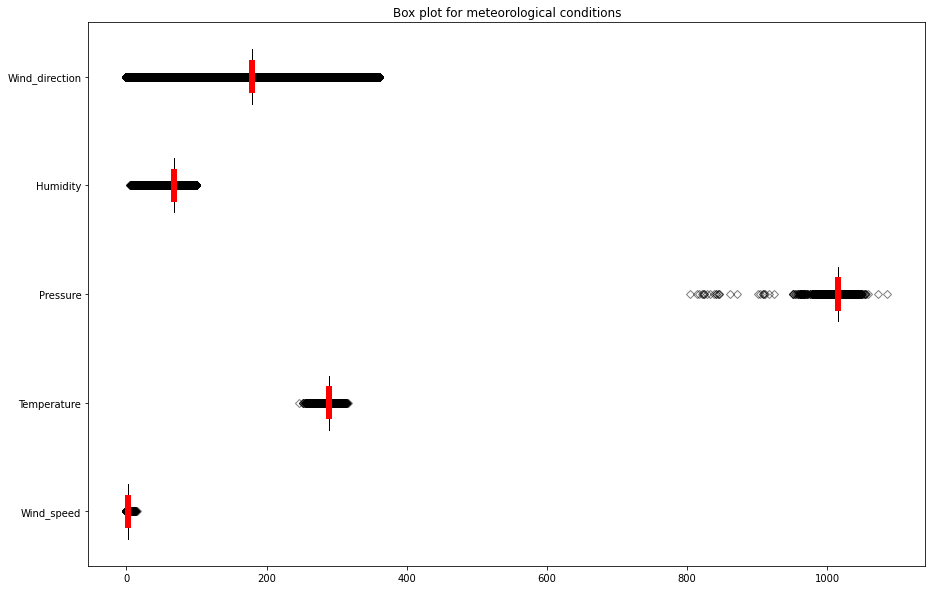

In [11]:
## plot box plots to check outliers

# Creating plot
fig = plt.figure(figsize =(15, 10))
ax = fig.add_subplot(111)

data = [data_merged_df['wind_speed'], data_merged_df['temperature'], data_merged_df['pressure'], data_merged_df['humidity'], data_merged_df['wind_direction']]


# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF', '#ff3600']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',linewidth = 6)

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',linewidth = 6)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',linewidth = 6)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',color ='#e7298a',alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['Wind_speed', 'Temperature','Pressure', 'Humidity', 'Wind_direction'])


# Adding title
plt.title("Box plot for meteorological conditions")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()


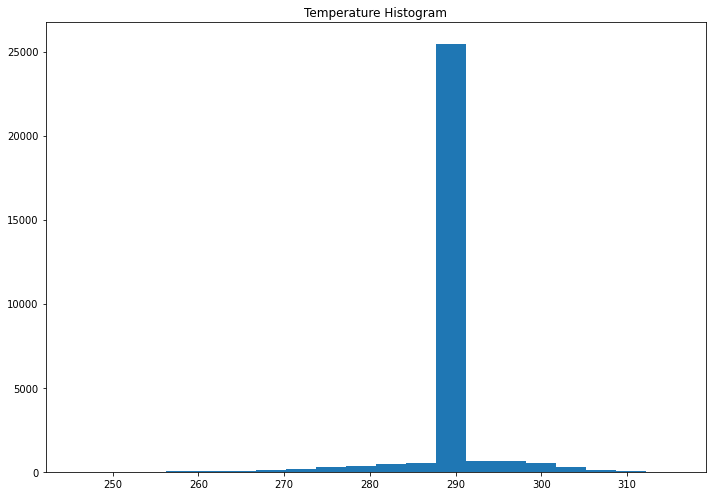

In [59]:
## Plot histogram to check distribution of data for the meteorological conditions

# import required packages
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

n_bins = 20

# Creating histogram
fig, axs = plt.subplots(1, 1,figsize =(10, 7),tight_layout = True)

axs.hist(data_merged_df['temperature'], bins = n_bins)
plt.title("Temperature Histogram")
# Show plot
plt.show()

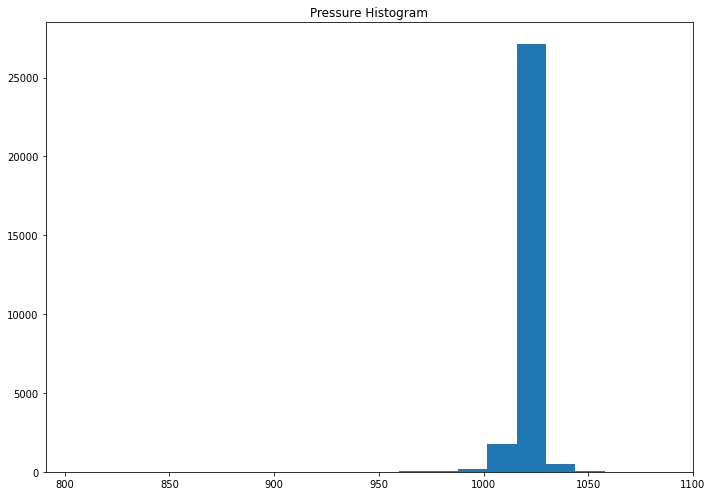

In [58]:

# import required packages
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

n_bins = 20

# Creating histogram
fig, axs = plt.subplots(1, 1,figsize =(10, 7),tight_layout = True)

axs.hist(data_merged_df['pressure'], bins = n_bins)
plt.title("Pressure Histogram")
# Show plot
plt.show()

<AxesSubplot:>

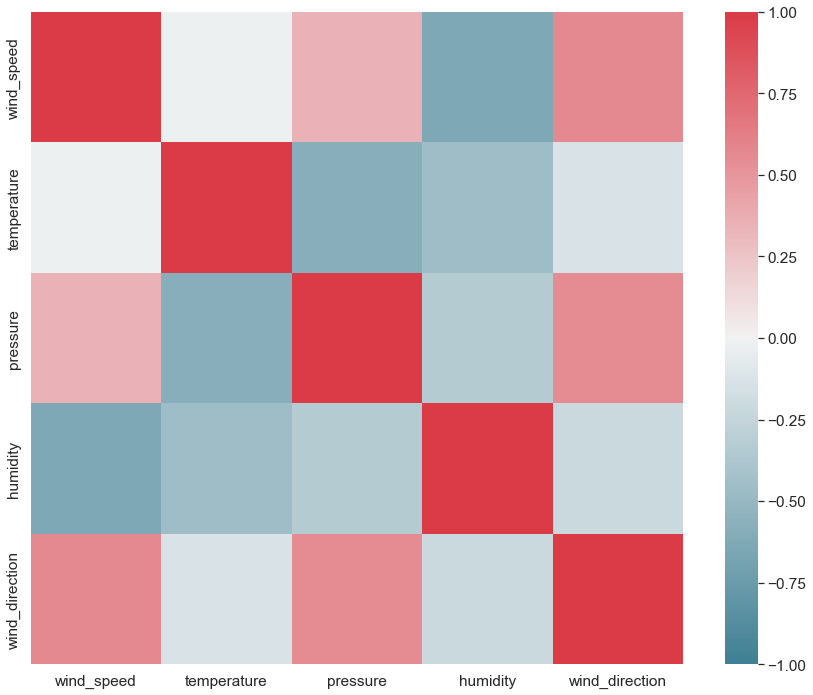

In [283]:
## A correlation matrix table below displays the correlation coefficients for different variables. 

import seaborn as sns

f, ax = plt.subplots(figsize=(15, 12))
corr = df_merged.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [14]:
## Features with: 
   # High correlation
   # medium correlation
   # Low correlation
    
data_merged_df['Weather_Condition'].unique()

array(['sky is clear', 'overcast clouds', 'light rain', 'moderate rain',
       'broken clouds', 'light intensity shower rain', 'fog', 'smoke',
       'mist', 'scattered clouds', 'few clouds', 'heavy intensity rain',
       'very heavy rain', 'light snow', 'proximity shower rain', 'haze',
       'heavy intensity drizzle', 'heavy snow', 'light intensity drizzle',
       'drizzle', 'proximity thunderstorm', 'squalls', 'thunderstorm',
       'snow', 'thunderstorm with light rain', 'thunderstorm with rain',
       'thunderstorm with heavy rain', 'heavy shower snow',
       'light shower snow', 'shower rain', 'dust'], dtype=object)

In [15]:


# sky is clear = 1
# few clouds = 2
# broken clouds = 3
# fog = 4
# overcast clouds = 5
# moderate rain = 6
# mist = 7
# scattered clouds = 8
# light rain = 9
# heavy intensity rain = 10
# proximity shower rain = 11
# haze = 12
# light intensity shower rain = 13
# heavy snow = 14
# dust = 15
# light snow  = 16
# smoke = 17
# thunderstorm with rain = 18
# light intensity drizzle = 19
# thunderstorm = 20
# proximity thunderstorm = 21
# thunderstorm with heavy rain = 22
# snow = 23
# thunderstorm with light rain =24
# heavy shower snow = 25
# very heavy rain = 26
# drizzle = 27
# light shower snow = 28

# print(data_merged_df['Weather_Condition'].value_counts())

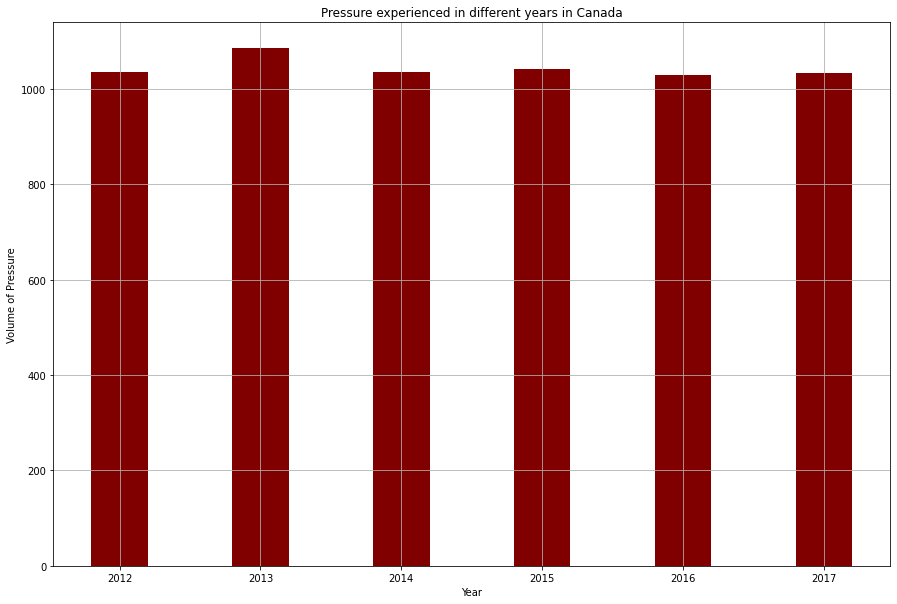

In [50]:
## Project Hypothesis 1
# The meteorological condition for pressure in Country Canada increases from the year 2012 to 2017
Canada_df = data_merged_df.loc[data_merged_df['Country'] == "Canada"]

fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(Canada_df['year'], Canada_df['pressure'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Volume of Pressure")
plt.title("Pressure experienced in different years in Canada")
plt.grid(True)
plt.show()

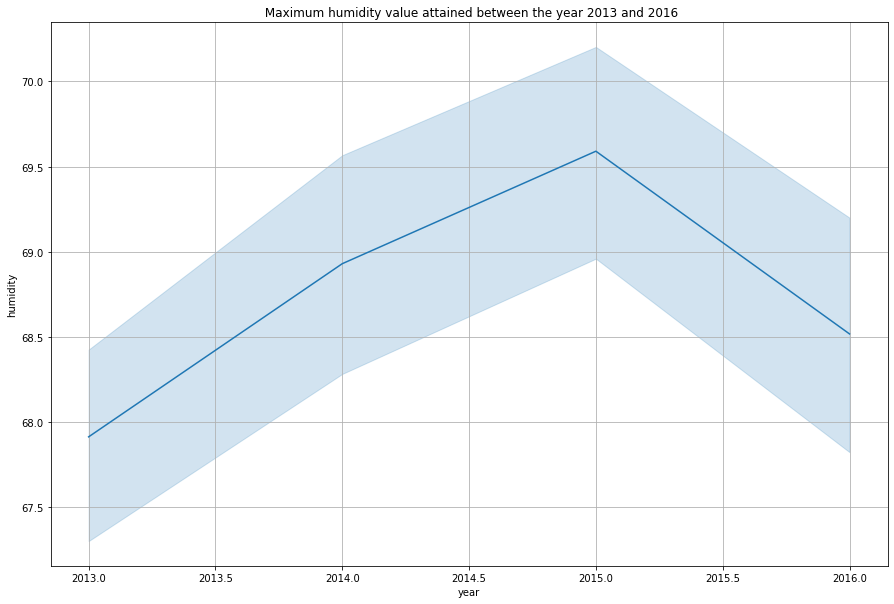

In [51]:
## Project Hypothesis 2
# The maximum humidity value attained between the year 2013 and 2016 is 70.0
Israel_df = data_merged_df.loc[(data_merged_df['Country'] == "Israel") & (data_merged_df['year'] > 2012) & (data_merged_df['year'] < 2017)]

fig = plt.figure(figsize = (15, 10))

sns.lineplot(x = Israel_df['year'], y = Israel_df['humidity'], data=Israel_df)
plt.grid(True)
plt.title(" Maximum humidity value attained between the year 2013 and 2016")
plt.show()

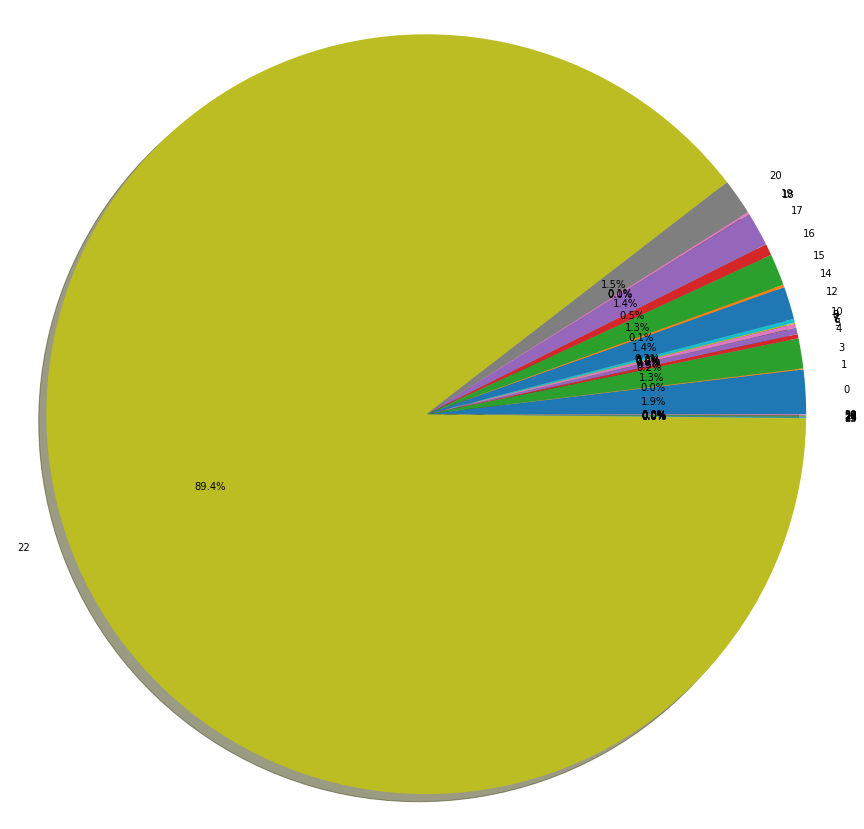

In [54]:
## Project Hypothesis 3
# The “sky is clear” weather condition was the most dominant condition that we could describe.

United_States_df = data_merged_df.loc[data_merged_df['Country'] == "United States"]

labels = United_States_df['Weather_Condition'].astype('category').cat.categories.tolist()
counts = United_States_df['Weather_Condition'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize = (15, 15))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

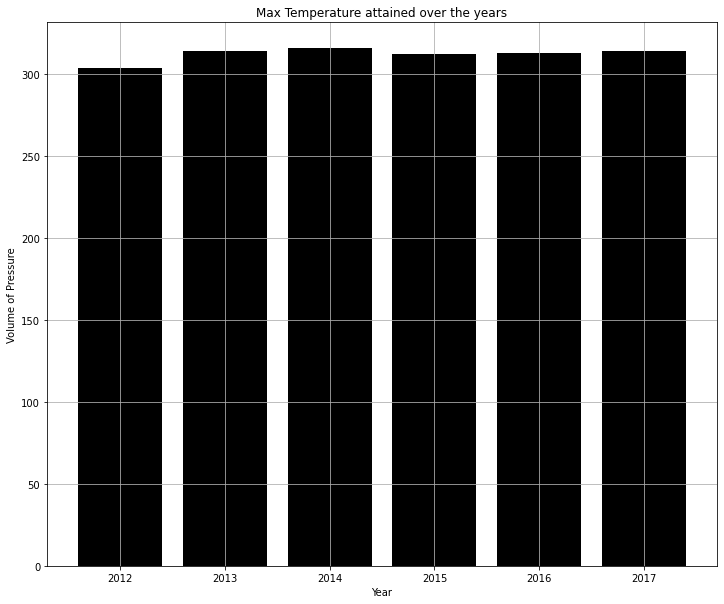

In [24]:
## Project Hypothesis 4
# The year 2016 was the year with highest temperatures as one of the meteorological condition.

fig = plt.figure(figsize = (12, 10))
 
# creating the bar plot
plt.bar(data_merged_df['year'], data_merged_df['temperature'], color ='black')
 
plt.xlabel("Year")
plt.ylabel("Volume of Pressure")
plt.title("Max Temperature attained over the years")
plt.grid(True)
plt.show()

In [36]:
## Label Encoding

# find the number of levels in Weather_Condition categorical variable
# data_merged['Weather_Condition'].unique()

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
data_merged_df['Weather_Condition'] = labelencoder.fit_transform(data_merged_df['Weather_Condition'])

data_merged = data_merged_df

In [27]:
## Data spliting

## first lets change the positions of columns in our dataframe
df_new = data_merged.reindex(['Latitude', 'Longitude', 'wind_speed','temperature', 'pressure', 'humidity', 'wind_direction', 'year', 'month', 'day', 'Weather_Condition'], axis=1)

# get the locations
X = df_new.iloc[:, :-1] # features
y = df_new.iloc[:, -1] # labels

# split the dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)


In [57]:
## Classification Techniques
# 1. Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Now we can predict which type of weather condition is likely to take place.
logreg.predict([[34.052231, -118.243683, 1.000000, 287.209209, 1014.333333, 67.843137, 195.098039, 2013, 3, 28]])

## Here, 22 indicates the weather condition "thunderstorm with heavy rain". This is the weather condition that we should be expecting

c:\users\o\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\o\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([22], dtype=int64)

In [37]:
# Evaluating the Algorithm using error metrics

## Make predictions on the test set
y_predd =logreg.predict(X_test)

print('Mean Absolute Error Logistic Regression:', metrics.mean_absolute_error(y_test, y_predd))  
print('Mean Squared Error Logistic Regression:', metrics.mean_squared_error(y_test, y_predd))  
print('Root Mean Squared Logistic Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_predd)))

# Evaluating the Algorithm using prediction/accuracy
# check the accuracy using actual and predicted values.
# Model Accuracy, how often is the classifier correct?
print("Accuracy for Logistic Regression:",metrics.accuracy_score(y_test, y_predd))

Mean Absolute Error Logistic Regression: 1.1168700324638978
Mean Squared Error Logistic Regression: 17.818090227247286
Root Mean Squared Logistic Regression: 4.221147975047462
Accuracy for Logistic Regression: 0.9003694167692824


c:\users\o\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


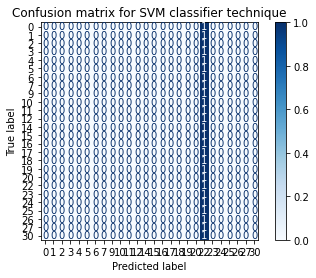

In [49]:
# Generate confusion matrix

matrix = plot_confusion_matrix(logreg, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for SVM classifier technique')
plt.show(matrix)
plt.show()

In [38]:
##2. Ramdom Forest

#Create a Gaussian Classifier
classifier=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

## Make predictions on the test set
y_pred=classifier.predict(X_test)

In [39]:
# Now we can predict which type of weather condition is likely to take place.

classifier.predict([[34.052231, -118.243683, 1.000000, 287.209209, 1014.333333, 67.843137, 195.098039, 2013, 3, 28]])

## Here, 22 indicates the weather condition "thunderstorm with heavy rain". This is the weather condition that we should be expecting

c:\users\o\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([22], dtype=int64)

In [40]:
# Evaluating the Algorithm using error metrics

print('Mean Absolute Error Random forest:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error Random forest:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error Random forest:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Evaluating the Algorithm using prediction/accuracy
# check the accuracy using actual and predicted values.
# Model Accuracy, how often is the classifier correct?
print("Accuracy for Random forest:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error Random forest: 1.175416993171387
Mean Squared Error Random forest: 18.403671778797715
Root Mean Squared Error Random forest: 4.2899500904786425
Accuracy for Random forest: 0.8937646927124147


In [41]:
# Feature Selection in Random Forest Algorithm Model

# view the feature scores

feature_scores = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

day               0.253488
month             0.158720
year              0.105290
Longitude         0.093506
Latitude          0.090321
temperature       0.067025
wind_speed        0.060936
humidity          0.059313
pressure          0.059162
wind_direction    0.052238
dtype: float64

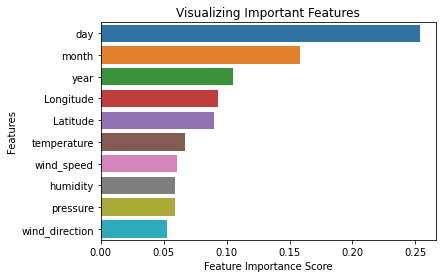

In [42]:
## Visualize feature scores of the features

# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)


# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')


# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [56]:
## 3. Support Vector Machine

svm = SVC(kernel='linear')

# fitting X_train samples and y_train classes
svm.fit(X_train, y_train)

svm.predict([[34.052231, -118.243683, 1.000000, 287.209209, 1014.333333, 67.843137, 195.098039, 2013, 3, 28]])

## Here, 22 indicates the weather condition "thunderstorm with heavy rain". This is the weather condition that we should be expecting

c:\users\o\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([22], dtype=int64)

In [46]:
# Evaluating the Algorithm using error metrics

## Make predictions on the test set
y_predict=svm.predict(X_test)

print('Mean Absolute Error SVM:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error SVM:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared SVM:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

# Evaluating the Algorithm using prediction/accuracy
# check the accuracy using actual and predicted values.
# Model Accuracy, how often is the classifier correct?
print("Accuracy for SVM:",metrics.accuracy_score(y_test, y_predict))

Mean Absolute Error SVM: 1.1168700324638978
Mean Squared Error SVM: 17.818090227247286
Root Mean Squared SVM: 4.221147975047462
Accuracy for SVM: 0.9003694167692824


c:\users\o\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x720 with 0 Axes>

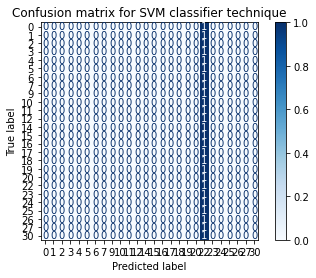

In [48]:
# Generate confusion matrix

fig = plt.figure(figsize = (15, 10))

matrix = plot_confusion_matrix(svm, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for SVM classifier technique')
plt.show(matrix)
plt.show()